In [45]:
# -----------------------------------------------------------------------------------
# Phase 4: Model Training
# -----------------------------------------------------------------------------------
# Objective:
# Train and evaluate classification models to automatically categorize transactions
# based on vendor, amount, payment method, and date-related features.
#
# Dataset:
# Preprocessed synthetic dataset from Phase 3 (X_train, X_test, y_train, y_test)
#
# Goal:
# Compare different classifiers (Logistic Regression, Random Forest, XGBoost, etc.)
# using accuracy, F1 score, and confusion matrix.
# -----------------------------------------------------------------------------------

In [47]:
# Core libraries for data manipulation
import pandas as pd
import numpy as np

# Machine learning models
from sklearn.linear_model import LogisticRegression           # Linear model for classification
from sklearn.ensemble import RandomForestClassifier           # Ensemble model using decision trees
from xgboost import XGBClassifier                             # Gradient boosting model for high accuracy

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Tools to evaluate model performance

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns                                         # Helpful for plotting confusion matrices and distributions

In [49]:

# Load the preprocessed dataset with encoded features
df = pd.read_csv("../data/synthetic_finory_preprocessed.csv")

# Define feature columns (inputs for the model)
feature_cols = ['vendor_encoded', 'amount_log', 'payment_encoded', 'day_of_week', 'month']

# Define target column (what we want the model to predict)
target_col = 'category_encoded'

# Split data into X (features) and y (target)
X = df[feature_cols]
y = df[target_col]

print("✅ Data loaded and features/target prepared!")

✅ Data loaded and features/target prepared!


In [51]:
from sklearn.model_selection import train_test_split

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split into training and test sets!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

✅ Data split into training and test sets!
Training set size: 4000 samples
Test set size: 1000 samples


🔹 Logistic Regression Performance 🔹
Accuracy: 0.483

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        42
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00        95
           5       0.51      0.93      0.66       521
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00        76

    accuracy                           0.48      1000
   macro avg       0.06      0.12      0.08      1000
weighted avg       0.27      0.48      0.34      1000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classifi

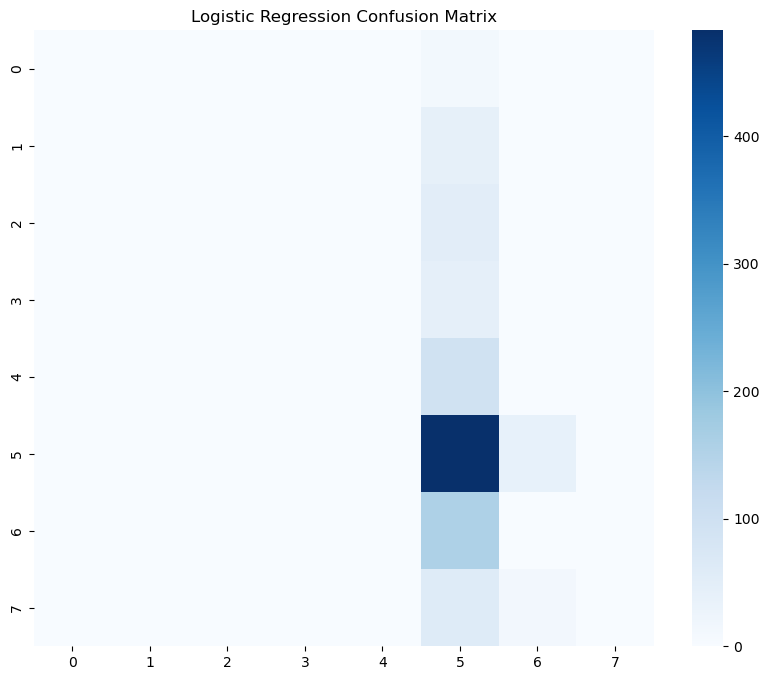

In [53]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with better solver
log_reg = LogisticRegression(max_iter=3000, multi_class='multinomial', solver='saga')
log_reg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate
print("🔹 Logistic Regression Performance 🔹")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=False, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

🌲 Random Forest Performance 🌲
Accuracy: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33        12
           1       0.30      0.17      0.22        42
           2       0.41      0.27      0.33        52
           3       0.32      0.16      0.21        45
           4       0.46      0.33      0.38        95
           5       0.57      0.69      0.62       521
           6       0.63      0.60      0.61       157
           7       0.39      0.34      0.36        76

    accuracy                           0.54      1000
   macro avg       0.45      0.35      0.38      1000
weighted avg       0.52      0.54      0.52      1000



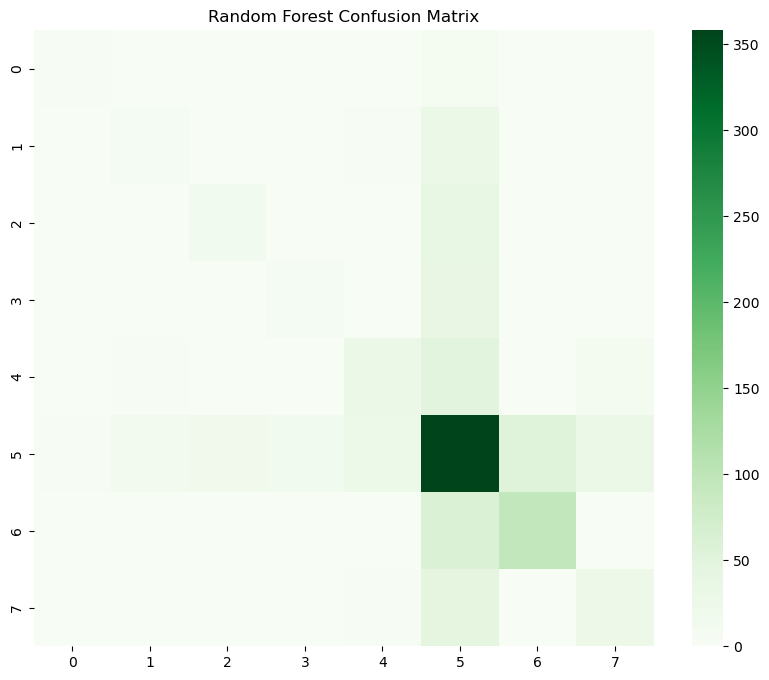

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🌲 Random Forest Performance 🌲")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=False, cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

🚀 XGBoost Performance 🚀
Accuracy: 0.536

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.25      0.29        12
           1       0.38      0.31      0.34        42
           2       0.31      0.17      0.22        52
           3       0.38      0.24      0.30        45
           4       0.50      0.37      0.42        95
           5       0.56      0.68      0.62       521
           6       0.63      0.56      0.59       157
           7       0.37      0.29      0.32        76

    accuracy                           0.54      1000
   macro avg       0.43      0.36      0.39      1000
weighted avg       0.52      0.54      0.52      1000



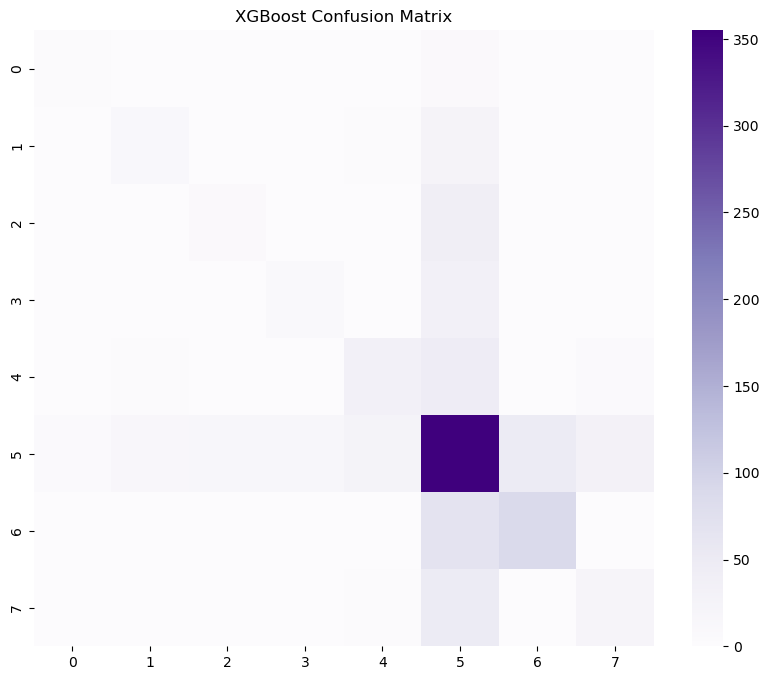

In [57]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(df['category_encoded'].unique()),  # number of unique categories
    n_estimators=300,
    learning_rate=0.1,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("🚀 XGBoost Performance 🚀")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=False, cmap="Purples")
plt.title("XGBoost Confusion Matrix")
plt.show()